In [1]:
# Dependencies
import tweepy
import time
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pprint import pprint
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#def ScanTweets():
def ScanTweets(tweet_id):
    #Gets last tweet where user has been mentioned
    mentions = api.mentions_timeline(since_id=tweet_id ,count=1)
    #If tweet list is not empty
    if mentions:
        for mention in mentions:
            #pprint (mention["text"])
            #pprint (mention)
            user_mentions = mention["entities"]["user_mentions"]
            #The user whose tweets will be analyzed is the second one mentioned in the tweet (index [1])
            target_user = user_mentions[1]["name"]
            requesting_user = mention["user"]["screen_name"]
            #Saving the incoming tweet id so that we do not repost the same analysis multiple times
            current_tweet_id = mention["id"]
            #for user_mention in user_mentions:
            #    print(counter)
            #    pprint (user_mention)
            #    counter = counter + 1
            #pprint(target_user)
            analysis= []
            #Analyze last 500 tweets
            #for x in range(1, 3):
            for x in range(1, 3):
                target_tweets = api.user_timeline(target_user, page=x, count=20)

                # Loop through all tweets
                for tweet in target_tweets:

                    # Run Vader Analysis on each tweet
                    results = TextBlob(tweet["text"])
                    analysis.append(results.sentiment.polarity)
        return analysis, target_user, requesting_user, current_tweet_id
    #If list is empty return empty list and the same tweet_id received
    else: 
        analysis = []
        current_tweet_id = tweet_id
        target_user = "None" 
        requesting_user = "None" 
        return analysis, target_user, requesting_user, current_tweet_id

        
    

In [4]:
def CreateDataFrame(analysis):
    #Creating data frame
    df = pd.DataFrame(analysis, columns=['Tweet Polarity'])

    #Generating a list with an index of tweets ago
    tweets_ago = []
    counter = 0
    length = len(df.index)

    for x in range(length):
        tweets_ago.append(counter)
        counter = counter - 1
        
    #Adding the list to the data frame
    df["Tweets Ago"] = tweets_ago
    #print(len(df))
    #df.head()
    return df

In [5]:
def PlotData(df, target_user, requesting_user, tweet_id):
    sns.set(style="whitegrid")
    df["Target"] = "@" + target_user
    fig = sns.lmplot(data=df, x="Tweets Ago", y="Tweet Polarity", hue = "Target", 
                      legend=True)
    date = time.strftime("%d/%m/%Y")
    plt.title("Sentiment Analysis of Tweets (" + str(date) + ") ")
    
    #plt.legend(mode="Expanded", 
    #              numpoints=1, scatterpoints=1, 
    #              loc="upper right" , 
    #              labelspacing=0.5, shadow=True)
    
    #Saving Figure to disk
    filename = "Resources/" + str(tweet_id) + ".png"
    plt.savefig(filename)
    #plt.show(fig)
    
    #Tweeting out
    
    api.update_with_media(filename,
                     "New Tweet Analysis: @" + target_user + " (Thanks @" + requesting_user + ")")


In [ ]:
#Initializing variables
counter = 0
last_tweet_id = "983129773936328703"

In loop


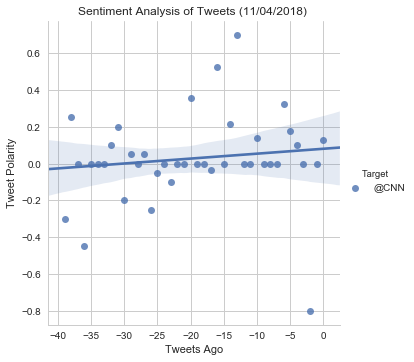

983129773936328705
1
In loop


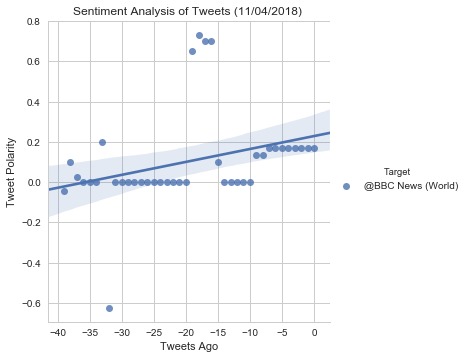

984268696657870849
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


In [ ]:
# Infinitely loop
while(True):

    #Repeat Analysis now that there are no new tweets
    analysis, target_user, requesting_user, new_tweet_id = ScanTweets(last_tweet_id)
    #Do analysis and plot only if there is a new tweet
    if (last_tweet_id != new_tweet_id):
        print("In loop")
        df = CreateDataFrame(analysis)
        PlotData(df, target_user, requesting_user, new_tweet_id)
        print(new_tweet_id)
        #Update tweet_id to the latest 
        last_tweet_id = new_tweet_id

    # Once tweeted, wait 300 seconds before doing anything else
    time.sleep(300)

    # Add 1 to the counter prior to re-running the loop
    counter = counter + 1
    print(str(counter))